## Task 5: Exploratory Data Analysis (EDA)

In [53]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings('ignore')
from zipfile import ZipFile


In [78]:
#function to load the dataset
def load_data(file_path):
    """
    Load the dataset from the specified file path.
    """
    if os.path.exists(file_path):
        data = pd.read_csv(file_path)
        return data
    else:
        raise FileNotFoundError(f"The file {file_path} does not exist.")

In [79]:
titanic= load_data('Titanic-Dataset.csv')
# Display the first few rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# missing values of individual columns and all columns
def missin_values(df):
    missing=df.isnull().sum() # check for missing values individual columns
    print("missing values in individual columns:\n",missing)
    missing_all=missing.sum() # check for missing values in all columns
    print("missing values in all columns:\n",missing_all)
    return (missing,missing_all)

missing,missing_all=missin_values(titanic)

missing values in individual columns:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
missing values in all columns:
 866


In [81]:
#dropping the columns which are not useful for analysis and having too many missing values
def drop_columns(df):
    """
    Drop unnecessary columns from the dataset.
    """
    df.drop(['PassengerId','Name','Cabin','Embarked'], axis=1, inplace=True)
    return df

drop_columns(titanic)

titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500


In [82]:
# Remove duplicate rows using .drop_duplicates() or Excel’s “Remove Duplicates”.
def remove_duplicates(df):
    before=df.shape[0] # check the number of rows before removing duplicates
    print("Before removing duplicates:",before)
    df.drop_duplicates(inplace=True) # remove duplicate rows and replacing
    after=df.shape[0] # check the number of rows after removing duplicates
    print("After removing duplicates:",after)
    duplicates=before-after # check the number of duplicates removed
    if duplicates>0:
        print("Duplicates removed:",duplicates)
    else:
        print("No duplicates found.")
    return df

remove_duplicates(titanic)

Before removing duplicates: 891
After removing duplicates: 876
Duplicates removed: 15


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000
887,1,1,female,19.0,0,0,112053,30.0000
888,0,3,female,NaN,1,2,W./C. 6607,23.4500
889,1,1,male,26.0,0,0,111369,30.0000


In [83]:
# function to replace missing values with mean, median or mode
def replace_missing_values(df):
    """
    Replace missing values in the dataset with mean, median or mode.
    """
    df['Age'].fillna(df['Age'].mean(), inplace=True) # replace missing values in Age with mean
    return df

replace_missing_values(titanic)
missing,missing_all=missin_values(titanic)

missing values in individual columns:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64
missing values in all columns:
 0


## a) Use .describe(), .info(), .value_counts()

In [84]:
print(titanic.info())
print(titanic.describe())  
print(titanic.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    object 
 3   Age       876 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Ticket    876 non-null    object 
 7   Fare      876 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 61.6+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  876.000000  876.000000  876.000000  876.000000  876.000000  876.000000
mean     0.383562    2.301370   29.744613    0.474886    0.372146   32.035354
std      0.486531    0.837983   13.074701    0.946843    0.801912   49.975363
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000

In [85]:
# one hot encoding for categorical variables and converting them into numerical values
titanic = pd.get_dummies(titanic, columns=["Sex"],dtype='int') # one hot encoding
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,A/5 21171,7.2500,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,1,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,1,0
3,1,1,35.0,1,0,113803,53.1000,1,0
4,0,3,35.0,0,0,373450,8.0500,0,1


## b.Use sns.pairplot(), sns.heatmap() for visualization

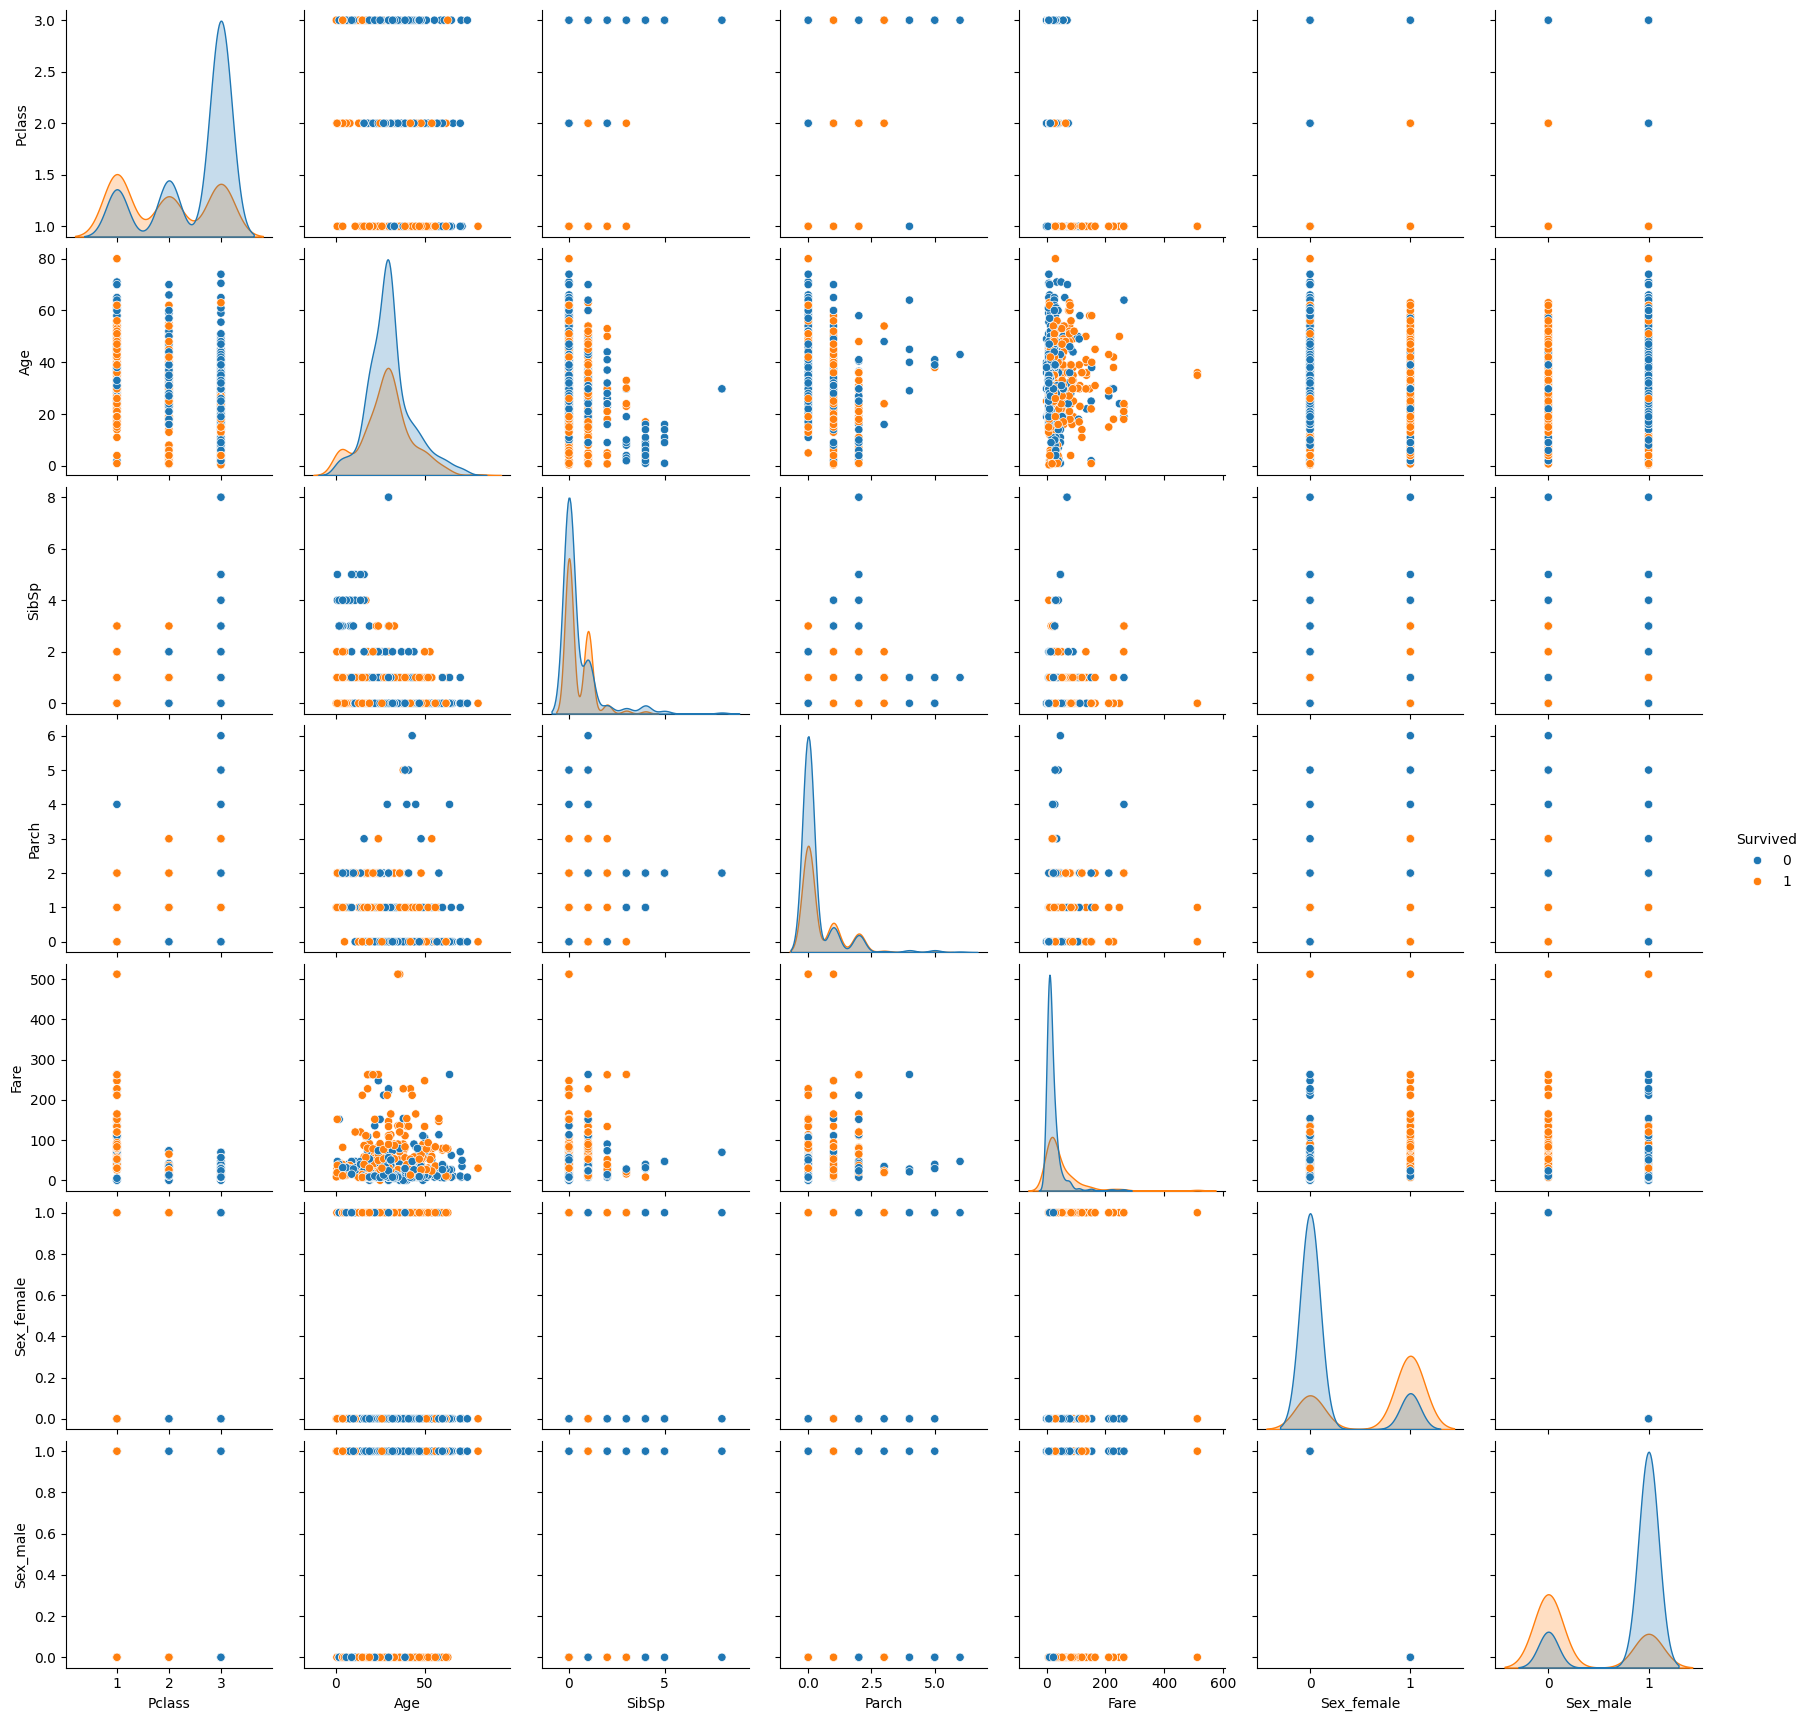

In [86]:
sns.pairplot(titanic, hue='Survived')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

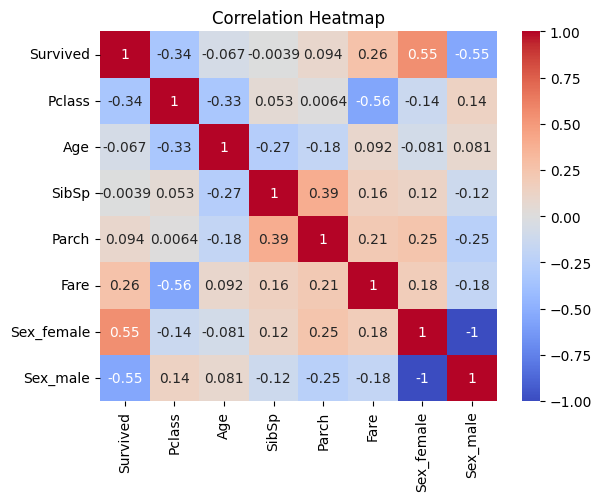

In [88]:
sns.heatmap(titanic.corr(numeric_only='true'),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## c.Identify relationships and trends
## from the heat map we can see that the correlation between Age and Survived is 0.08 which is very low.
## from the heat map we can see that the correlation between fare and fare is 0.26 which is some what considerable,but not much high.


## d.Plot histograms, boxplots, scatterplots

Text(0.5, 0, 'Fare')

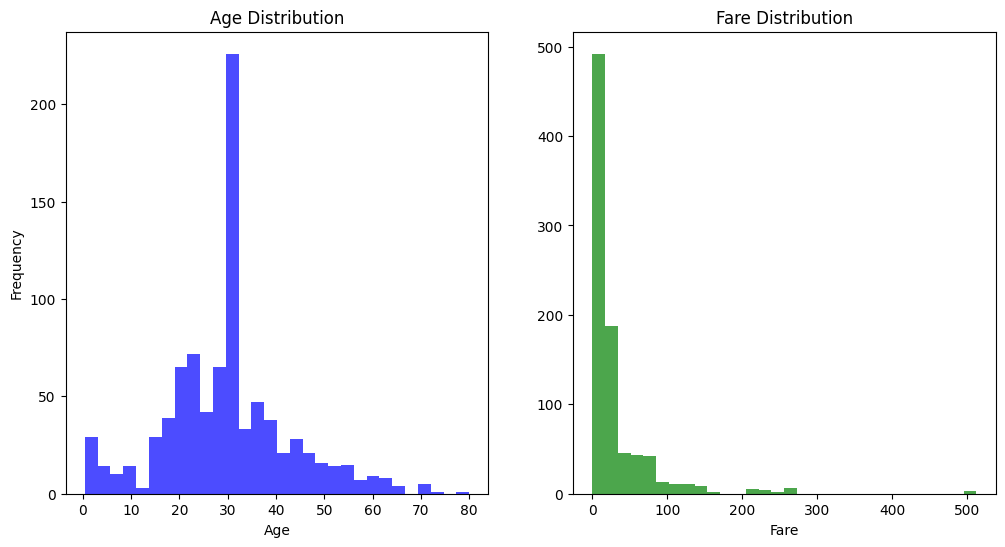

In [92]:
# histogram for Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(titanic['Age'], bins=30, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(titanic['Fare'], bins=30, color='green', alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')

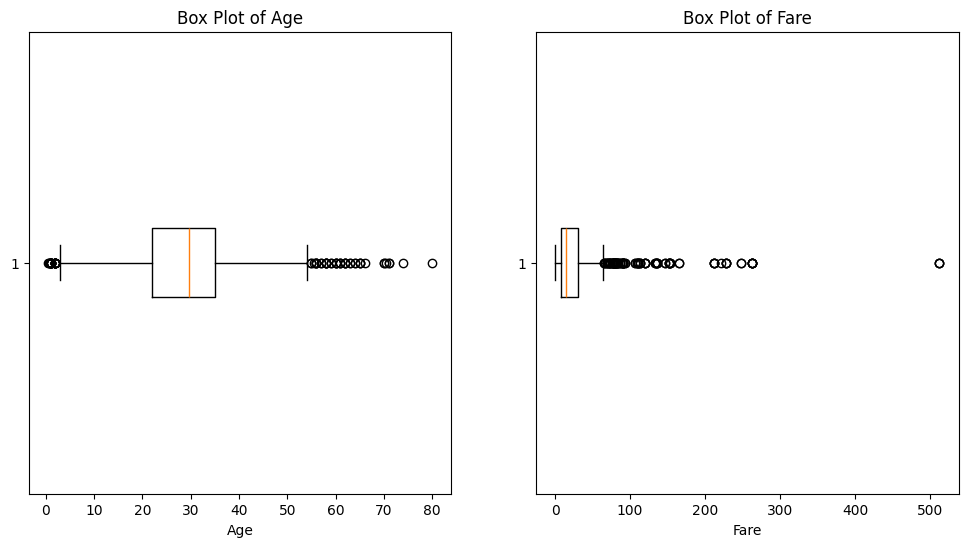

In [93]:
# BOX PLOT for Age and Fare
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(titanic['Age'], vert=False) 
plt.title('Box Plot of Age')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
plt.boxplot(titanic['Fare'], vert=False)
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()

## found many outliers in Age and Fare columns

In [94]:

# function to remove outliers using IQR method
def remove_outliers(df):
    """
    Remove outliers from the dataset using IQR method.
    """
    Q1 = df['Age'].quantile(0.25) # first quartile
    Q3 = df['Age'].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_bound = Q1 - 1.5 * IQR # lower bound
    upper_bound = Q3 + 1.5 * IQR # upper bound
    df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)] # remove outliers in Age

    Q1 = df['Fare'].quantile(0.25) # first quartile
    Q3 = df['Fare'].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_bound = Q1 - 1.5 * IQR # lower bound
    upper_bound = Q3 + 1.5 * IQR # upper bound
    df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)] # remove outliers in Fare

    return df

titanic = remove_outliers(titanic) # remove outliers from the dataset

titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male
0,0,3,22.000000,1,0,A/5 21171,7.2500,0,1
2,1,3,26.000000,0,0,STON/O2. 3101282,7.9250,1,0
3,1,1,35.000000,1,0,113803,53.1000,1,0
4,0,3,35.000000,0,0,373450,8.0500,0,1
5,0,3,29.744613,0,0,330877,8.4583,0,1


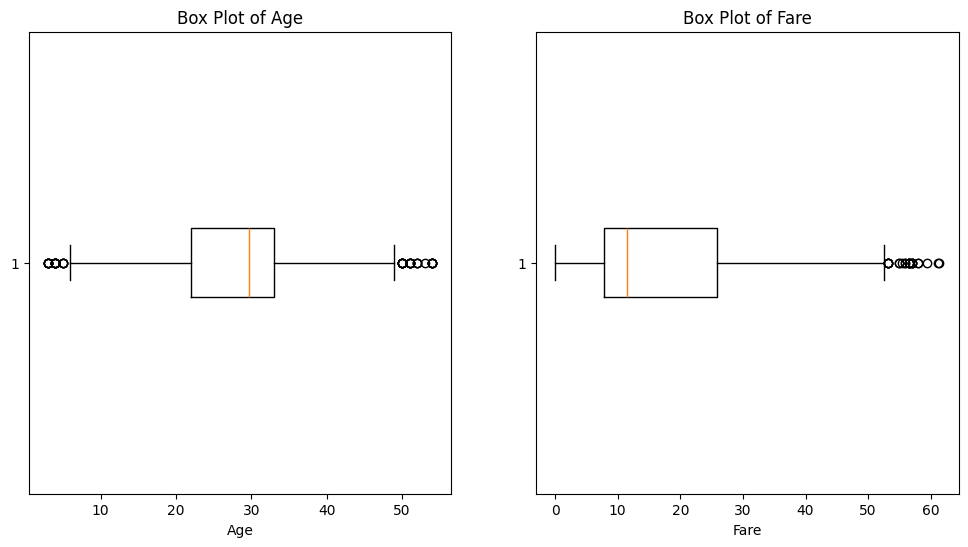

In [95]:
# BOX PLOT for Age and Fare
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(titanic['Age'], vert=False) 
plt.title('Box Plot of Age')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
plt.boxplot(titanic['Fare'], vert=False)
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()

Text(0, 0.5, 'Survived')

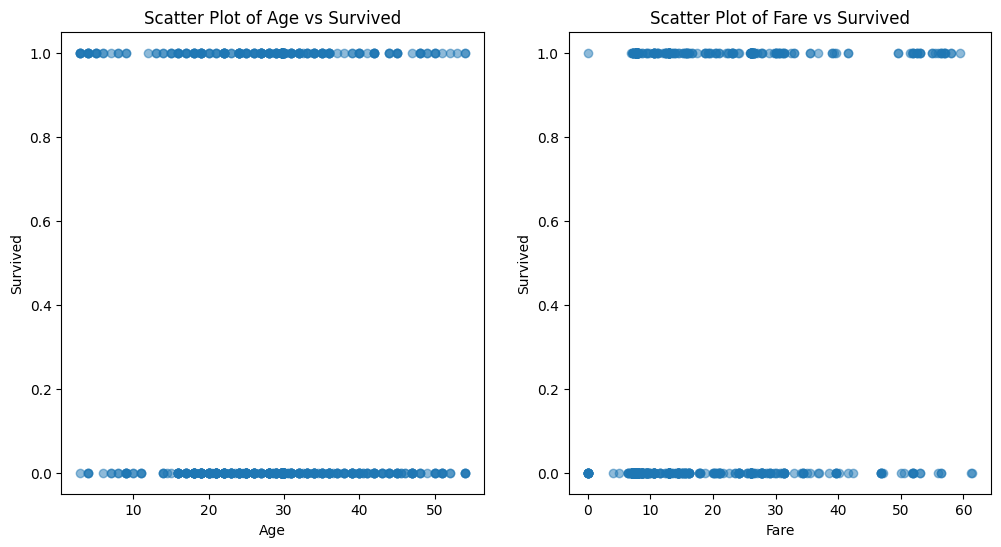

In [97]:
# scatterplots for Age and Fare
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(titanic['Age'], titanic['Survived'], alpha=0.5)
plt.title('Scatter Plot of Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Survived')

plt.subplot(1, 2, 2)
plt.scatter(titanic['Fare'], titanic['Survived'], alpha=0.5)
plt.title('Scatter Plot of Fare vs Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')

## f.Provide summary of findings

##1. from the heat map we can see that the correlation between Age and Survived is 0.08 which is very low.
##2. from the heat map we can see that the correlation between fare and fare is 0.26 which is some what considerable,but not much high.

##3. found many outliers in Age and Fare columns which were removed

##4. no proper relation between Survived and Age ,and Survived and Fare.
